In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,\
                                    GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,\
                             RandomForestRegressor

In [170]:
df = pd.read_csv('../data/cleaned_merged_df.csv', index_col = 0)

In [171]:
income_cols = [col for col in df.columns if 'income' in col]
df.drop(columns=income_cols, inplace=True)

**Interpretation:** Income columns will leak data.

In [172]:
df.drop(df.loc[df['median_year_structure_built'] == 0].index, inplace=True)

In [173]:
df.corr()['poverty_rate'].sort_values(ascending=True).head(20)

pct_white                                                     -0.430186
median_rent                                                   -0.428841
owner_occupied_housing_units_lower_value_quartile             -0.427806
owner_occupied_housing_units_median_value                     -0.406843
renter_occupied_housing_units_paying_cash_median_gross_rent   -0.394517
owner_occupied_housing_units_upper_value_quartile             -0.372865
median_age                                                    -0.232440
white_male_45_54                                              -0.177227
pct_asian                                                     -0.174043
white_male_55_64                                              -0.171020
white_pop                                                     -0.167565
pct_family_house                                              -0.160105
male_45_64_graduate_degree                                    -0.145815
male_45_64_bachelors_degree                                   -0

In [174]:
df.corr()['poverty_rate'].sort_values(ascending=False).head(20)

poverty_rate                                  1.000000
gini_index                                    0.591088
pct_black                                     0.479602
death_rate                                    0.277747
pct_amerindian                                0.227037
pct_nonfamily_house                           0.160105
median_year_structure_built                   0.123335
staffed_icu_beds_[per_1000_elderly_(65+)]     0.112316
staffed_icu_beds_[per_1000_adults_(20+)]      0.108958
staffed_all_beds_[per_1000_elderly_(65+)]     0.107186
staffed_icu_beds_[per_1000_people]            0.105337
licensed_all_beds_[per_1000_elderly_(65+)]    0.100839
amerindian_pop                                0.099992
pct_female                                    0.093795
mobile_homes                                  0.074977
licensed_all_beds_[per_1000_adults_(20+)]     0.063920
licensed_all_beds_[per_1000_people]           0.056335
staffed_all_beds_[per_1000_adults_(20+)]      0.056033
pct_hispan

<AxesSubplot:ylabel='Frequency'>

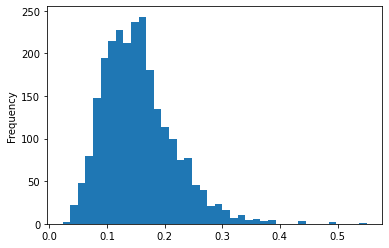

In [175]:
df['poverty_rate'].plot(kind='hist', bins=40)

Text(0, 0.5, 'DEATH RATE')

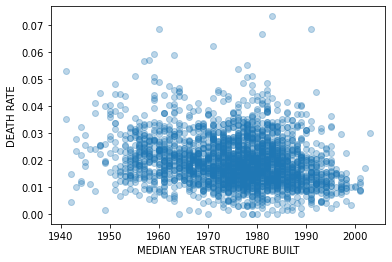

In [178]:
plt.scatter(df.median_year_structure_built,
            df.death_rate, alpha=.3)
plt.xlabel('MEDIAN YEAR STRUCTURE BUILT')
plt.ylabel('DEATH RATE')

In [179]:
X_cols = [col for col in df.columns if 'pct_' in col]
X_cols.remove('pct_not_hispanic')
X_cols.remove('pct_nonfamily_house')
X_cols.remove('pct_male')

X_cols.append('death_rate')
X_cols.append('median_year_structure_built')
X_cols.append('median_age')
X_cols.append('all_bed_occupancy_rate')

X = df[X_cols]
y = df['poverty_rate']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Linear Regression

In [183]:
lr = LinearRegression()
cv_score = cross_val_score(lr, X_train_sc, y_train)
print(cv_score.mean(), cv_score.std())
cv_score

0.43076276197498753 0.06445098057378032


array([0.39573578, 0.43821486, 0.38318959, 0.55319078, 0.3834828 ])

In [184]:
lr.fit(X_train_sc, y_train)
print('train score', lr.score(X_train_sc, y_train))
print('test score', lr.score(X_test_sc, y_test))

train score 0.44728454772666215
test score 0.48491346464911056


In [185]:
pd.DataFrame(lr.coef_, index=X_train.columns)[0].map(lambda x: round(x, 4)).sort_values()

pct_white                      -0.2441
pct_black                      -0.1564
pct_hispanic                   -0.1560
pct_amerindian                 -0.0714
pct_asian                      -0.0484
pct_two_or_more_races          -0.0235
pct_family_house               -0.0163
median_age                     -0.0113
all_bed_occupancy_rate         -0.0071
pct_other_race                 -0.0054
pct_male_male_households       -0.0039
pct_female_female_households    0.0003
pct_female                      0.0034
median_year_structure_built     0.0088
death_rate                      0.0109
Name: 0, dtype: float64

Text(0, 0.5, 'POVERTY RATE')

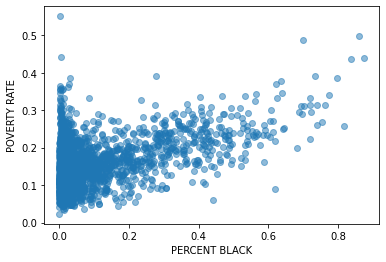

In [186]:
plt.scatter(df['pct_black'], df['poverty_rate'], alpha = .5)
plt.xlabel('PERCENT BLACK')
plt.ylabel('POVERTY RATE')

Text(0, 0.5, 'POVERTY RATE')

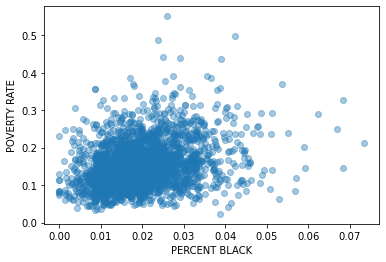

In [187]:
plt.scatter(df['death_rate'], df['poverty_rate'], alpha = .4)
plt.xlabel('PERCENT BLACK')
plt.ylabel('POVERTY RATE')

scaled  0.31177659, 0.34379026, 0.30268388, 0.30058899, 0.35387436]


In [190]:
X_train.columns

Index(['pct_family_house', 'pct_male_male_households',
       'pct_female_female_households', 'pct_female', 'pct_white', 'pct_black',
       'pct_asian', 'pct_hispanic', 'pct_amerindian', 'pct_other_race',
       'pct_two_or_more_races', 'death_rate', 'median_year_structure_built',
       'median_age', 'all_bed_occupancy_rate'],
      dtype='object')

In [191]:
lasso = Lasso(max_iter = 1000, alpha=.00001, tol = 0.0001)
cv_score = cross_val_score(lasso, X_train, y_train)
print(cv_score.mean(), cv_score.std())
cv_score

0.419313019520002 0.06474611451989157


array([0.37793531, 0.42480507, 0.36281827, 0.54218208, 0.38882438])

### Support Vector Regressor

In [192]:
# svr = SVR()

# params = {
#     'kernel': ['rbf', 'sigmoid', 'linear'],
#     'gamma': ['scale'],
#     'C': [.001, .01, .1, 1]
# }

# gs = GridSearchCV(svr, param_grid=params, verbose=3, n_jobs = 5)
# gs.fit(X_train_sc, y_train)
# print(gs.score(X_test, y_test))
# gs.best_params_

### Random Forest Regressor

In [196]:
rfr = RandomForestRegressor()

params = {
    'n_estimators': [75, 100, 125],
    'max_depth': [3, 4],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6],
}

gs = GridSearchCV(rfr, param_grid=params, verbose=2, n_jobs = 5)
gs.fit(X_train, y_train)
print('train score', gs.score(X_train, y_train))
print('test score', gs.score(X_test, y_test))
gs.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
train score 0.4668646255678709
test score 0.42742431600592734


{'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 75}

In [198]:
rfr = RandomForestRegressor(max_depth=4,
 min_samples_leaf=4,
 min_samples_split=4,
 n_estimators=125)

print(cross_val_score(rfr, X_train, y_train))
rfr.fit(X_train, y_train)
print(rfr.score(X_test, y_test), rfr.score(X_train, y_train))

[0.32911553 0.39628866 0.340037   0.49349534 0.38592609]
0.4324517213616347 0.4633012439410453


In [203]:
feature_df

,0
pct_black,0.549651
median_age,0.096760
pct_amerindian,0.091475
pct_asian,0.062696
pct_white,0.040759
death_rate,0.039342
pct_hispanic,0.037419
pct_family_house,0.027380
median_year_structure_built,0.019927
pct_female,0.010654


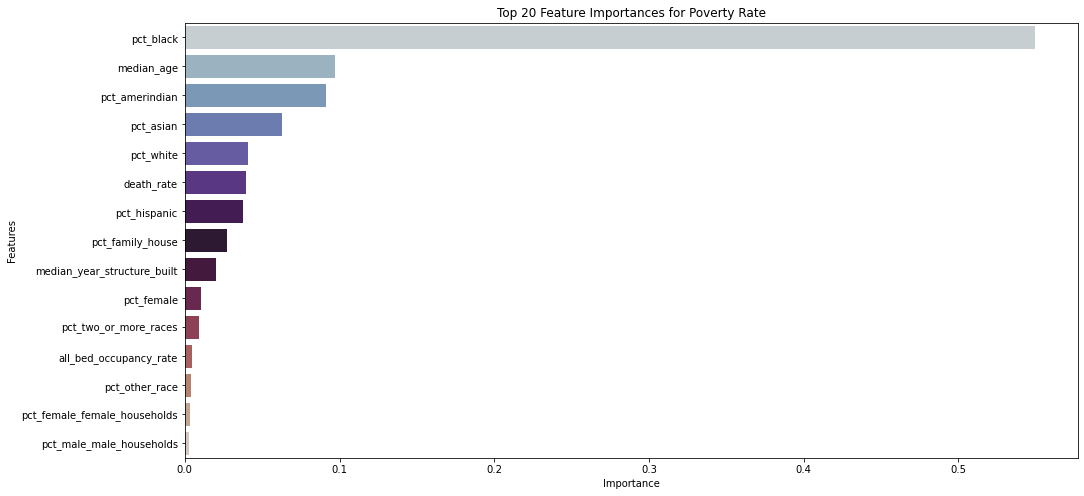

In [211]:
feature_df = pd.DataFrame(rfr.feature_importances_, index=X_train.columns)\
.sort_values(by=0, ascending=False)

plt.figure(figsize=(16, 8))

sns.barplot(x=feature_df[0], y=feature_df.index, palette='twilight')

plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances for Poverty Rate')

plt.savefig('../images/poverty_feature_importances');

### AdaBoost Regressor

In [200]:
ada = AdaBoostRegressor()

params = {
    'n_estimators': [40, 50, 70, 100],
    'learning_rate': [.01, .001],
    'loss': ['linear', 'square', 'exponential']
}

gs = GridSearchCV(ada, param_grid=params, verbose=3, n_jobs= 5)
gs.fit(X_train, y_train)
print('train score', gs.score(X_train, y_train))
print('test score', gs.score(X_test, y_test))
gs.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
train score 0.3646246469663025
test score 0.33068946330379156


{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 100}

In [46]:
ada = AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=3,
                                                             min_samples_leaf=10,
                                                             min_samples_split=10,
                                                             n_estimators=75),
                        learning_rate=.001)

ada.fit(X_train, y_train)
print('train score', ada.score(X_train, y_train))
print('test score', ada.score(X_test, y_test))

train score 0.38916089354305294
test score 0.3676912957495354


### Gradient Boosting Regressor

In [47]:
gbr = GradientBoostingRegressor()

params = {
    'loss': ['ls', 'lad', 'huber'],
    'learning_rate': [.001, .001],
    'n_estimators': [120, 200, 250],
    'max_depth': [2, 3, 4]
}

gs = GridSearchCV(gbr, param_grid=params, verbose=3, n_jobs= 5)
gs.fit(X_train, y_train)
print('train score', gs.score(X_train, y_train))
print('test score', gs.score(X_test, y_test))
gs.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

In [ ]:
df['pct_black'].max(), df['poverty_rate'].max()

In [ ]:
plt.scatter(df['poverty_rate'], df['death_rate'])
plt.xlabel('POVERTY RATE')
plt.ylabel('DEATH RATE');